In [1]:
import numpy as np
from matplotlib import pyplot as plt
import cv2
import time
import utils

# Bild 1

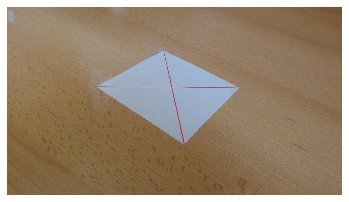

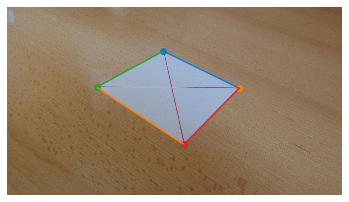

In [2]:
img = cv2.imread('IMG 1.png')

p1 = [1866.0, 530.0, 1.0]
p2 = [2771.0, 974.0, 1.0]
p3 = [1067.0, 961.0, 1.0]
p4 = [2112.0, 1646.0, 1.0]

l1 = np.cross(p1, p2)
l2 = np.cross(p3, p4)
m1 = np.cross(p1, p3)
m2 = np.cross(p2, p4)

img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)
plt.axis('off')
plt.show()

plt.imshow(img)
plt.scatter(p1[0], p1[1])
plt.scatter(p2[0], p2[1])
plt.scatter(p3[0], p3[1])
plt.scatter(p4[0], p4[1])
plt.plot([p1[0], p2[0]], [p1[1], p2[1]])
plt.plot([p3[0], p4[0]], [p3[1], p4[1]])
plt.plot([p1[0], p3[0]], [p1[1], p3[1]])
plt.plot([p2[0], p4[0]], [p2[1], p4[1]])
plt.axis('off')
plt.savefig('IMG 1 (mit Punkten).png', dpi = 300)
plt.show()

In [3]:
h = utils.getAffineMatrix(l1, l2, m1, m2)

In [4]:
p1 = utils.transformPoint(p1, h)
p2 = utils.transformPoint(p2, h)
p3 = utils.transformPoint(p3, h)
p4 = utils.transformPoint(p4, h)

Laufzeit: 162.092s


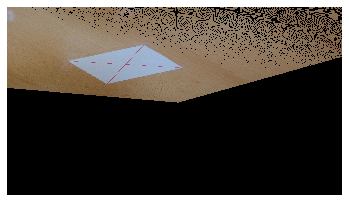

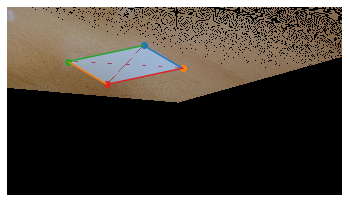

In [5]:
start = time.time()
affineImg1 = utils.transformImage(img, h)
end = time.time()
print('Laufzeit: {:5.3f}s'.format(end - start))

affineImg1 = cv2.cvtColor(affineImg1, cv2.COLOR_RGB2BGR)
cv2.imwrite('IMG 1 (affin) (1).png', affineImg1)
affineImg1 = cv2.cvtColor(affineImg1, cv2.COLOR_BGR2RGB)

plt.imshow(affineImg1)
plt.axis('off')
plt.show()

plt.imshow(affineImg1)
plt.scatter(p1[0], p1[1])
plt.scatter(p2[0], p2[1])
plt.scatter(p3[0], p3[1])
plt.scatter(p4[0], p4[1])
plt.plot([p1[0], p2[0]], [p1[1], p2[1]])
plt.plot([p3[0], p4[0]], [p3[1], p4[1]])
plt.plot([p1[0], p3[0]], [p1[1], p3[1]])
plt.plot([p2[0], p4[0]], [p2[1], p4[1]])
plt.axis('off')
plt.savefig('IMG 1 (affin mit Punkten) (1).png', dpi = 300)
plt.show()

Laufzeit: 0.183s


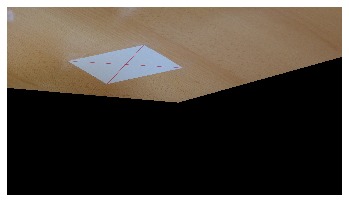

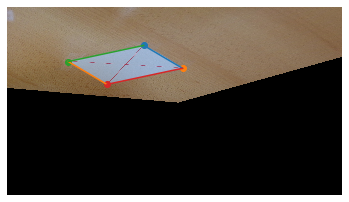

In [6]:
start = time.time()
affineImg2 = cv2.warpPerspective(img, np.array(h), (img.shape[1], img.shape[0]))
end = time.time()
print('Laufzeit: {:5.3f}s'.format(end - start))

affineImg2 = cv2.cvtColor(affineImg2, cv2.COLOR_RGB2BGR)
cv2.imwrite('IMG 1 (affin) (2).png', affineImg2)
affineImg2 = cv2.cvtColor(affineImg2, cv2.COLOR_BGR2RGB)

plt.imshow(affineImg2)
plt.axis('off')
plt.show()

plt.imshow(affineImg2)
plt.scatter(p1[0], p1[1])
plt.scatter(p2[0], p2[1])
plt.scatter(p3[0], p3[1])
plt.scatter(p4[0], p4[1])
plt.plot([p1[0], p2[0]], [p1[1], p2[1]])
plt.plot([p3[0], p4[0]], [p3[1], p4[1]])
plt.plot([p1[0], p3[0]], [p1[1], p3[1]])
plt.plot([p2[0], p4[0]], [p2[1], p4[1]])
plt.axis('off')
plt.savefig('IMG 1 (affin mit Punkten) (2).png', dpi = 300)
plt.show()

In [7]:
print(p1)
print(p2)
print(p3)
print(p4)

[1630.0, 463.0, 1.0]
[2094.0, 736.0, 1.0]
[728.0, 655.0, 1.0]
[1191.0, 928.0, 1.0]


In [8]:
l1 = np.cross(p1, p2)
m1 = np.cross(p1, p3)
l2 = np.cross(p1, p4)
m2 = np.cross(p3, p2)

h = utils.getMetricMatrix(l1, m1, l2, m2)

In [9]:
p1 = utils.transformPoint(p1, h)
p2 = utils.transformPoint(p2, h)
p3 = utils.transformPoint(p3, h)
p4 = utils.transformPoint(p4, h)

Laufzeit: 110.202s


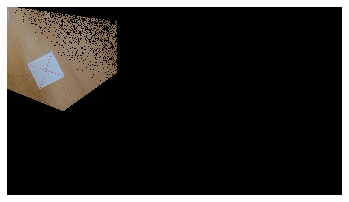

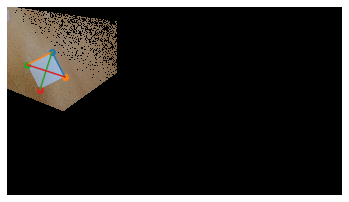

In [10]:
start = time.time()
metricImg1 = utils.transformImage(affineImg1, h)
end = time.time()
print('Laufzeit: {:5.3f}s'.format(end - start))

metricImg1 = cv2.cvtColor(metricImg1, cv2.COLOR_RGB2BGR)
cv2.imwrite('IMG 1 (metrisch) (1).png', metricImg1)
metricImg1 = cv2.cvtColor(metricImg1, cv2.COLOR_BGR2RGB)

plt.imshow(metricImg1)
plt.axis('off')
plt.show()

plt.imshow(metricImg1)
plt.scatter(p1[0], p1[1])
plt.scatter(p2[0], p2[1])
plt.scatter(p3[0], p3[1])
plt.scatter(p4[0], p4[1])
plt.plot([p1[0], p2[0]], [p1[1], p2[1]])
plt.plot([p1[0], p3[0]], [p1[1], p3[1]])
plt.plot([p1[0], p4[0]], [p1[1], p4[1]])
plt.plot([p3[0], p2[0]], [p3[1], p2[1]])
plt.axis('off')
plt.savefig('IMG 1 (metrisch mit Punkten) (1).png', dpi = 300)
plt.show()

Laufzeit: 0.179s


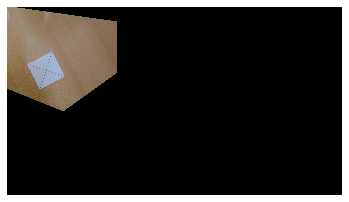

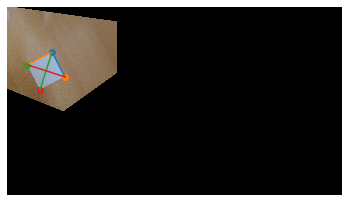

In [11]:
start = time.time()
metricImg2 = cv2.warpPerspective(affineImg2, np.array(h), (img.shape[1], img.shape[0]))
end = time.time()
print('Laufzeit: {:5.3f}s'.format(end - start))

metricImg2 = cv2.cvtColor(metricImg2, cv2.COLOR_RGB2BGR)
cv2.imwrite('IMG 1 (metrisch) (2).png', metricImg2)
metricImg2 = cv2.cvtColor(metricImg2, cv2.COLOR_BGR2RGB)

plt.imshow(metricImg2)
plt.axis('off')
plt.show()

plt.imshow(metricImg2)
plt.scatter(p1[0], p1[1])
plt.scatter(p2[0], p2[1])
plt.scatter(p3[0], p3[1])
plt.scatter(p4[0], p4[1])
plt.plot([p1[0], p2[0]], [p1[1], p2[1]])
plt.plot([p1[0], p3[0]], [p1[1], p3[1]])
plt.plot([p1[0], p4[0]], [p1[1], p4[1]])
plt.plot([p3[0], p2[0]], [p3[1], p2[1]])
plt.axis('off')
plt.savefig('IMG 1 (metrisch mit Punkten) (2).png', dpi = 300)
plt.show()

In [12]:
print(p1)
print(p2)
print(p3)
print(p4)

[536.0, 542.0, 1.0]
[688.0, 839.0, 1.0]
[239.0, 694.0, 1.0]
[391.0, 991.0, 1.0]


# Bild 2

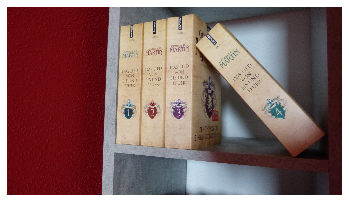

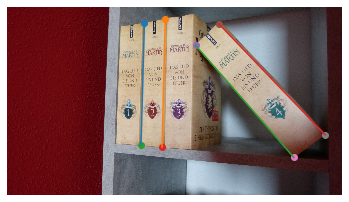

In [13]:
img = cv2.imread('IMG 2.png')

p1 = [1639.0, 199.0, 1.0]
p2 = [1888.0, 151.0, 1.0]
p3 = [1598.0, 1657.0, 1.0]
p4 = [1849.0, 1678.0, 1.0]
p5 = [2251.0, 463.0, 1.0]
p6 = [2524.0, 201.0, 1.0]
p7 = [3424.0, 1801.0, 1.0]
p8 = [3799.0, 1530.0, 1.0]

l1 = np.cross(p1, p3)
l2 = np.cross(p2, p4)
m1 = np.cross(p5, p7)
m2 = np.cross(p6, p8)

img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)
plt.axis('off')
plt.show()

plt.imshow(img)
plt.scatter(p1[0], p1[1])
plt.scatter(p2[0], p2[1])
plt.scatter(p3[0], p3[1])
plt.scatter(p4[0], p4[1])
plt.scatter(p5[0], p5[1])
plt.scatter(p6[0], p6[1])
plt.scatter(p7[0], p7[1])
plt.scatter(p8[0], p8[1])
plt.plot([p1[0], p3[0]], [p1[1], p3[1]])
plt.plot([p2[0], p4[0]], [p2[1], p4[1]])
plt.plot([p5[0], p7[0]], [p5[1], p7[1]])
plt.plot([p6[0], p8[0]], [p6[1], p8[1]])
plt.axis('off')
plt.savefig('IMG 2 (mit Punkten).png', dpi = 300)
plt.show()

In [14]:
h = utils.getAffineMatrix(l1, l2, m1, m2)

In [15]:
p1 = utils.transformPoint(p1, h)
p2 = utils.transformPoint(p2, h)
p3 = utils.transformPoint(p3, h)
p4 = utils.transformPoint(p4, h)
p5 = utils.transformPoint(p5, h)
p6 = utils.transformPoint(p6, h)
p7 = utils.transformPoint(p7, h)
p8 = utils.transformPoint(p8, h)

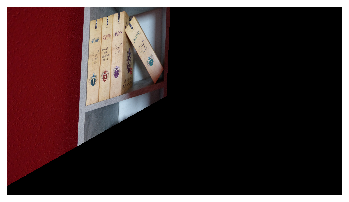

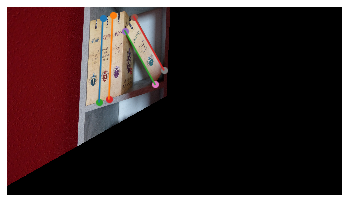

In [16]:
affineImg = cv2.warpPerspective(img, np.array(h), (img.shape[1], img.shape[0]))

affineImg = cv2.cvtColor(affineImg, cv2.COLOR_RGB2BGR)
cv2.imwrite('IMG 2 (affin).png', affineImg)
affineImg = cv2.cvtColor(affineImg, cv2.COLOR_BGR2RGB)

plt.imshow(affineImg)
plt.axis('off')
plt.show()

plt.imshow(affineImg)
plt.scatter(p1[0], p1[1])
plt.scatter(p2[0], p2[1])
plt.scatter(p3[0], p3[1])
plt.scatter(p4[0], p4[1])
plt.scatter(p5[0], p5[1])
plt.scatter(p6[0], p6[1])
plt.scatter(p7[0], p7[1])
plt.scatter(p8[0], p8[1])
plt.plot([p1[0], p3[0]], [p1[1], p3[1]])
plt.plot([p2[0], p4[0]], [p2[1], p4[1]])
plt.plot([p5[0], p7[0]], [p5[1], p7[1]])
plt.plot([p6[0], p8[0]], [p6[1], p8[1]])
plt.axis('off')
plt.savefig('IMG 2 (affin mit Punkten).png', dpi = 300)
plt.show()

In [17]:
print(p1)
print(p2)
print(p3)
print(p4)
print(p5)
print(p6)
print(p7)
print(p8)

[1142.0, 138.0, 1.0]
[1259.0, 100.0, 1.0]
[1097.0, 1137.0, 1.0]
[1214.0, 1101.0, 1.0]
[1405.0, 289.0, 1.0]
[1513.0, 120.0, 1.0]
[1765.0, 928.0, 1.0]
[1869.0, 753.0, 1.0]


In [18]:
l1 = np.cross(p1, p2)
m1 = np.cross(p1, p3)
l2 = np.cross(p5, p6)
m2 = np.cross(p5, p7)

h = utils.getMetricMatrix(l1, m1, l2, m2)

In [19]:
p1 = utils.transformPoint(p1, h)
p2 = utils.transformPoint(p2, h)
p3 = utils.transformPoint(p3, h)
p4 = utils.transformPoint(p4, h)
p5 = utils.transformPoint(p5, h)
p6 = utils.transformPoint(p6, h)
p7 = utils.transformPoint(p7, h)
p8 = utils.transformPoint(p8, h)

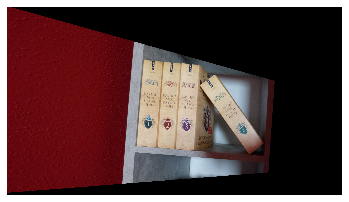

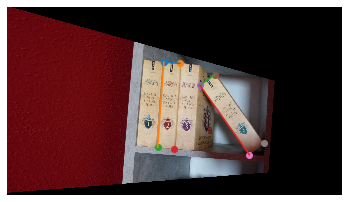

In [20]:
metricImg = cv2.warpPerspective(affineImg, np.array(h), (img.shape[1], img.shape[0]))

metricImg = cv2.cvtColor(metricImg, cv2.COLOR_RGB2BGR)
cv2.imwrite('IMG 2 (metrisch).png', metricImg)
metricImg = cv2.cvtColor(metricImg, cv2.COLOR_BGR2RGB)

plt.imshow(metricImg)
plt.axis('off')
plt.show()

plt.imshow(metricImg)
plt.scatter(p1[0], p1[1])
plt.scatter(p2[0], p2[1])
plt.scatter(p3[0], p3[1])
plt.scatter(p4[0], p4[1])
plt.scatter(p5[0], p5[1])
plt.scatter(p6[0], p6[1])
plt.scatter(p7[0], p7[1])
plt.scatter(p8[0], p8[1])
plt.plot([p1[0], p2[0]], [p1[1], p2[1]])
plt.plot([p1[0], p3[0]], [p1[1], p3[1]])
plt.plot([p5[0], p6[0]], [p5[1], p6[1]])
plt.plot([p5[0], p7[0]], [p5[1], p7[1]])
plt.axis('off')
plt.savefig('IMG 2 (metrisch mit Punkten).png', dpi = 300)
plt.show()

In [21]:
print(p1)
print(p2)
print(p3)
print(p4)
print(p5)
print(p6)
print(p7)
print(p8)

[1871.0, 664.0, 1.0]
[2063.0, 677.0, 1.0]
[1797.0, 1680.0, 1.0]
[1989.0, 1696.0, 1.0]
[2302.0, 940.0, 1.0]
[2479.0, 814.0, 1.0]
[2892.0, 1768.0, 1.0]
[3062.0, 1633.0, 1.0]


# Bild 3

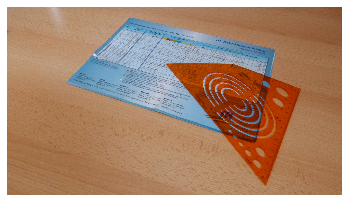

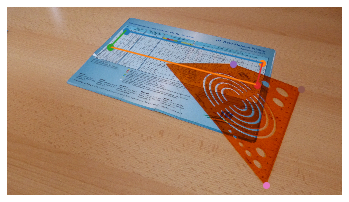

In [22]:
img = cv2.imread('IMG 3.png')

p1 = [1416.0, 286.0, 1.0]
p2 = [3049.0, 674.0, 1.0]
p3 = [1231.0, 479.0, 1.0]
p4 = [2980.0, 932.0, 1.0]
p5 = [2693.0, 685.0, 1.0]
p6 = [3508.0, 987.0, 1.0]
p7 = [3093.0, 2134.0, 1.0]

l1 = np.cross(p1, p2)
l2 = np.cross(p3, p4)
m1 = np.cross(p1, p3)
m2 = np.cross(p2, p4)

img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)
plt.axis('off')
plt.show()

plt.imshow(img)
plt.scatter(p1[0], p1[1])
plt.scatter(p2[0], p2[1])
plt.scatter(p3[0], p3[1])
plt.scatter(p4[0], p4[1])
plt.scatter(p5[0], p5[1])
plt.scatter(p6[0], p6[1])
plt.scatter(p7[0], p7[1])
plt.plot([p1[0], p2[0]], [p1[1], p2[1]])
plt.plot([p3[0], p4[0]], [p3[1], p4[1]])
plt.plot([p1[0], p3[0]], [p1[1], p3[1]])
plt.plot([p2[0], p4[0]], [p2[1], p4[1]])
plt.axis('off')
plt.savefig('IMG 3 (mit Punkten).png', dpi = 300)
plt.show()

In [23]:
h = utils.getAffineMatrix(l1, l2, m1, m2)

In [24]:
p1 = utils.transformPoint(p1, h)
p2 = utils.transformPoint(p2, h)
p3 = utils.transformPoint(p3, h)
p4 = utils.transformPoint(p4, h)
p5 = utils.transformPoint(p5, h)
p6 = utils.transformPoint(p6, h)
p7 = utils.transformPoint(p7, h)

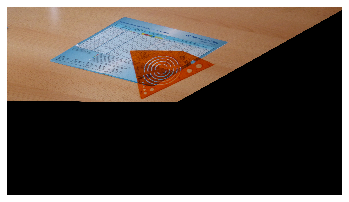

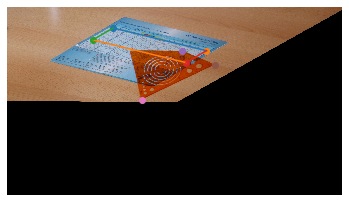

In [25]:
affineImg = cv2.warpPerspective(img, np.array(h), (img.shape[1], img.shape[0]))

affineImg = cv2.cvtColor(affineImg, cv2.COLOR_RGB2BGR)
cv2.imwrite('IMG 3 (affin).png', affineImg)
affineImg = cv2.cvtColor(affineImg, cv2.COLOR_BGR2RGB)

plt.imshow(affineImg)
plt.axis('off')
plt.show()

plt.imshow(affineImg)
plt.scatter(p1[0], p1[1])
plt.scatter(p2[0], p2[1])
plt.scatter(p3[0], p3[1])
plt.scatter(p4[0], p4[1])
plt.scatter(p5[0], p5[1])
plt.scatter(p6[0], p6[1])
plt.scatter(p7[0], p7[1])
plt.plot([p1[0], p2[0]], [p1[1], p2[1]])
plt.plot([p3[0], p4[0]], [p3[1], p4[1]])
plt.plot([p1[0], p3[0]], [p1[1], p3[1]])
plt.plot([p2[0], p4[0]], [p2[1], p4[1]])
plt.axis('off')
plt.savefig('IMG 3 (affin mit Punkten).png', dpi = 300)
plt.show()

In [26]:
print(p1)
print(p2)
print(p3)
print(p4)
print(p5)
print(p6)
print(p7)

[1265.0, 255.0, 1.0]
[2380.0, 526.0, 1.0]
[1022.0, 397.0, 1.0]
[2136.0, 668.0, 1.0]
[2091.0, 532.0, 1.0]
[2477.0, 696.0, 1.0]
[1608.0, 1109.0, 1.0]


In [27]:
l1 = np.cross(p1, p2)
m1 = np.cross(p1, p3)
l2 = np.cross(p6, p5)
m2 = np.cross(p6, p7)

h = utils.getMetricMatrix(l1, m1, l2, m2)

In [28]:
p1 = utils.transformPoint(p1, h)
p2 = utils.transformPoint(p2, h)
p3 = utils.transformPoint(p3, h)
p4 = utils.transformPoint(p4, h)
p5 = utils.transformPoint(p5, h)
p6 = utils.transformPoint(p6, h)
p7 = utils.transformPoint(p7, h)

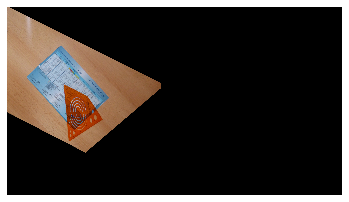

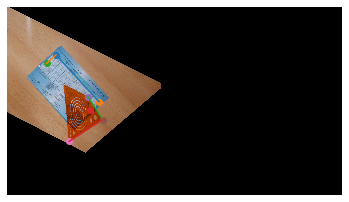

In [29]:
metricImg = cv2.warpPerspective(affineImg, np.array(h), (img.shape[1], img.shape[0]))

metricImg = cv2.cvtColor(metricImg, cv2.COLOR_RGB2BGR)
cv2.imwrite('IMG 3 (metrisch).png', metricImg)
metricImg = cv2.cvtColor(metricImg, cv2.COLOR_BGR2RGB)

plt.imshow(metricImg)
plt.axis('off')
plt.show()

plt.imshow(metricImg)
plt.scatter(p1[0], p1[1])
plt.scatter(p2[0], p2[1])
plt.scatter(p3[0], p3[1])
plt.scatter(p4[0], p4[1])
plt.scatter(p5[0], p5[1])
plt.scatter(p6[0], p6[1])
plt.scatter(p7[0], p7[1])
plt.plot([p1[0], p2[0]], [p1[1], p2[1]])
plt.plot([p1[0], p3[0]], [p1[1], p3[1]])
plt.plot([p6[0], p5[0]], [p6[1], p5[1]])
plt.plot([p6[0], p7[0]], [p6[1], p7[1]])
plt.axis('off')
plt.savefig('IMG 3 (metrisch mit Punkten).png', dpi = 300)
plt.show()

In [30]:
print(p1)
print(p2)
print(p3)
print(p4)
print(p5)
print(p6)
print(p7)

[582.0, 576.0, 1.0]
[1096.0, 1135.0, 1.0]
[470.0, 678.0, 1.0]
[984.0, 1238.0, 1.0]
[963.0, 1075.0, 1.0]
[1141.0, 1348.0, 1.0]
[740.0, 1609.0, 1.0]


# Bild 4

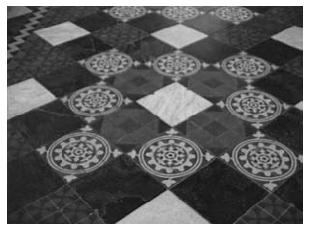

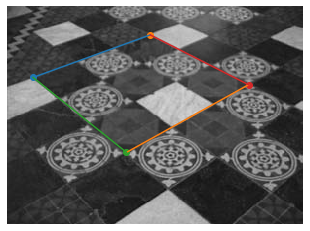

In [31]:
img = cv2.imread('IMG 4.png')

p1 = [78.0, 215.0, 1.0]
p2 = [433.0, 86.0, 1.0]
p3 = [361.0, 442.0, 1.0]
p4 = [731.0, 237.0, 1.0]

l1 = np.cross(p1, p2)
l2 = np.cross(p3, p4)
m1 = np.cross(p1, p3)
m2 = np.cross(p2, p4)

img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)
plt.axis('off')
plt.show()

plt.imshow(img)
plt.scatter(p1[0], p1[1])
plt.scatter(p2[0], p2[1])
plt.scatter(p3[0], p3[1])
plt.scatter(p4[0], p4[1])
plt.plot([p1[0], p2[0]], [p1[1], p2[1]])
plt.plot([p3[0], p4[0]], [p3[1], p4[1]])
plt.plot([p1[0], p3[0]], [p1[1], p3[1]])
plt.plot([p2[0], p4[0]], [p2[1], p4[1]])
plt.axis('off')
plt.savefig('IMG 4 (mit Punkten).png', dpi = 300)
plt.show()

In [32]:
h = utils.getAffineMatrix(l1, l2, m1, m2)

In [33]:
p1 = utils.transformPoint(p1, h)
p2 = utils.transformPoint(p2, h)
p3 = utils.transformPoint(p3, h)
p4 = utils.transformPoint(p4, h)

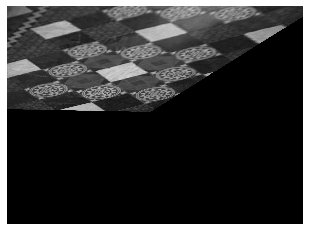

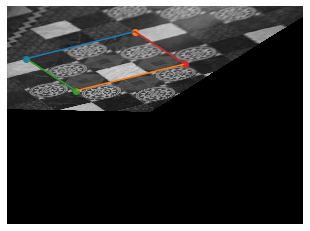

In [34]:
affineImg = cv2.warpPerspective(img, np.array(h), (img.shape[1], img.shape[0]))

affineImg = cv2.cvtColor(affineImg, cv2.COLOR_RGB2BGR)
cv2.imwrite('IMG 4 (affin).png', affineImg)
affineImg = cv2.cvtColor(affineImg, cv2.COLOR_BGR2RGB)

plt.imshow(affineImg)
plt.axis('off')
plt.show()

plt.imshow(affineImg)
plt.scatter(p1[0], p1[1])
plt.scatter(p2[0], p2[1])
plt.scatter(p3[0], p3[1])
plt.scatter(p4[0], p4[1])
plt.plot([p1[0], p2[0]], [p1[1], p2[1]])
plt.plot([p3[0], p4[0]], [p3[1], p4[1]])
plt.plot([p1[0], p3[0]], [p1[1], p3[1]])
plt.plot([p2[0], p4[0]], [p2[1], p4[1]])
plt.axis('off')
plt.savefig('IMG 4 (affin mit Punkten).png', dpi = 300)
plt.show()

In [35]:
print(p1)
print(p2)
print(p3)
print(p4)

[57.0, 158.0, 1.0]
[386.0, 76.0, 1.0]
[208.0, 255.0, 1.0]
[538.0, 174.0, 1.0]


In [36]:
l1 = np.cross(p1, p2)
m1 = np.cross(p1, p3)
l2 = np.cross(p1, p4)
m2 = np.cross(p3, p2)

h = utils.getMetricMatrix(l1, m1, l2, m2)

In [37]:
p1 = utils.transformPoint(p1, h)
p2 = utils.transformPoint(p2, h)
p3 = utils.transformPoint(p3, h)
p4 = utils.transformPoint(p4, h)

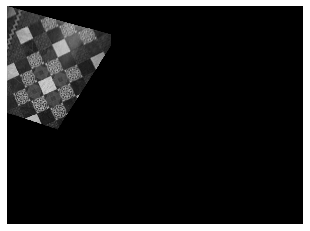

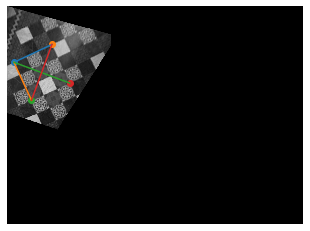

In [38]:
metricImg = cv2.warpPerspective(affineImg, np.array(h), (img.shape[1], img.shape[0]))

metricImg = cv2.cvtColor(metricImg, cv2.COLOR_RGB2BGR)
cv2.imwrite('IMG 4 (metrisch).png', metricImg)
metricImg = cv2.cvtColor(metricImg, cv2.COLOR_BGR2RGB)

plt.imshow(metricImg)
plt.axis('off')
plt.show()

plt.imshow(metricImg)
plt.scatter(p1[0], p1[1])
plt.scatter(p2[0], p2[1])
plt.scatter(p3[0], p3[1])
plt.scatter(p4[0], p4[1])
plt.plot([p1[0], p2[0]], [p1[1], p2[1]])
plt.plot([p1[0], p3[0]], [p1[1], p3[1]])
plt.plot([p1[0], p4[0]], [p1[1], p4[1]])
plt.plot([p3[0], p2[0]], [p3[1], p2[1]])
plt.axis('off')
plt.savefig('IMG 4 (metrisch mit Punkten).png', dpi = 300)
plt.show()

In [39]:
print(p1)
print(p2)
print(p3)
print(p4)

[20.0, 169.0, 1.0]
[135.0, 115.0, 1.0]
[73.0, 284.0, 1.0]
[189.0, 232.0, 1.0]
